In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import numpy as np

In [3]:
st = pd.read_csv("student_diversity_data_id.csv", dtype={"DIST_ID":str, 'COUNTY_ID':str,'SCHOOL_ID':str, 'CONCAT_ID':str })

In [4]:
tea = pd.read_csv('teacher_diversity_data_id.csv', dtype={'CO_CODE':str, 'DIST_CODE':str, 'SCHOOL_CODE':str, 'TEACH_CONCAT_CODE':str})

In [5]:
tea = tea[tea['POSITION'] == 'TEACHER']
tea = tea[tea['GENDER'] == 'Total']
tea = tea[tea['SCHOOL_CODE'] != '998']
tea = tea[tea['SCHOOL_CODE'] != '0']
tea = tea[tea['SCHOOL_CODE'] != '999']


In [6]:
st['White_pcnt'] = st['White_pcnt']*100
st['black_pnct'] = st['black_pnct']*100
st['Hispanic_pnct'] = st['Hispanic_pnct']*100
st['Asian_pnct'] = st['Asian_pnct']*100
st['Other_pnct'] = st['Other_pnct']*100
st['Pnct_minority'] = st['Pnct_minority']*100

In [7]:
st = st[[ u'COUNTY_NAME', u'DIST_ID', u'LEA_NAME', u'SCHOOL_ID',
       u'SCHOOL_NAME', u'ROW_TOTAL', u'White_total',
       u'Black_total', u'Hispanic_total', u'Asian_total', u'Other_total',
       u'White_pcnt', u'black_pnct', u'Hispanic_pnct', u'Asian_pnct',
       u'Other_pnct', u'Diversity_index', u'District_diversity_index',
       u'DI_diff_btwn_schl_distrct', u'District_pnct_white',
       u'Pnct_white_diff', u'Pnct_minority', u'CONCAT_ID']]

st = st.rename(columns={u'White_total':'Wh_tot_s', u'Black_total':'Bl_tot_s', u'Hispanic_total':'His_tot_s', u'Asian_total':'As_tot_s', u'Other_total':'Ot_tot_s',
       u'White_pcnt':'Wh_pct_s', u'black_pnct':'Bl_pct_s', u'Hispanic_pnct':'His_pct_s', u'Asian_pnct':'As_pct_s',
       u'Other_pnct':'Ot_pct_s', u'Diversity_index':'Div_index_s_schl','Pnct_minority':'Min_pct_s','ROW_TOTAL':'Tot_s', 'CONCAT_ID':'Concat_id_s'})

/Users/epetenko/miniconda2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


In [8]:
tea = tea[[ u'COUNTY_NAME', u'DIST_CODE', u'DISTRICT_NAME',
       u'SCHOOL_CODE', u'SCHOOL_NAME', u'WHITE',
       u'WH_PCT', u'BLACK', u'BL_PCT', u'HISPANIC', u'HI_PCT', u'ASIAN',
       u'AS_PCT', u'AMERICAN_INDIAN', u'AM_PCT', u'PACIFIC_ISLANDER',
       u'PI_PCT', u'OTHER', u'OT_PCT', u'MIN_PCT', u'TOTAL',
       u'TEACH_CONCAT_CODE']]

tea = tea.rename(columns={u'WHITE':'Wh_tot_t',
       u'WH_PCT':'Wh_pct_t', u'BLACK':'Bl_tot_t', u'BL_PCT':'Bl_pct_t', u'HISPANIC':'His_tot_t', 
        u'HI_PCT':'His_pct_t', u'ASIAN':'As_tot_t',
       u'AS_PCT':'As_pct_t', u'AMERICAN_INDIAN':'Am_tot_t', u'AM_PCT':'Am_pct_t', u'PACIFIC_ISLANDER':'Pi_tot_t',
       u'PI_PCT':'Pi_pct_t', u'OTHER':'Ot_tot_t', u'OT_PCT':'Ot_pct_t', u'MIN_PCT':'Min_pct_t', u'TOTAL':'Tot_t'})

In [9]:
print "Student percent White: ", st['Wh_tot_s'].sum()/st['Tot_s'].sum()
print "Teacher percent White: ", tea['Wh_tot_t'].sum()/tea['Tot_t'].sum()
print "Student percent Black: ", st['Bl_tot_s'].sum()/st['Tot_s'].sum()
print "Teacher percent Black: ", tea['Bl_tot_t'].sum()/tea['Tot_t'].sum()
print "Student percent Hispanic: ", st['His_tot_s'].sum()/st['Tot_s'].sum()
print "Teacher percent Hispanic: ", tea['His_tot_t'].sum()/tea['Tot_t'].sum()
print "Student percent Asian: ",st['As_tot_s'].sum()/st['Tot_s'].sum()
print "Teacher percent Asian: ", tea['As_tot_t'].sum()/tea['Tot_t'].sum()

Student percent White:  0.46396274678
Teacher percent White:  0.847282266713
Student percent Black:  0.157561424695
Teacher percent Black:  0.0631021066532
Student percent Hispanic:  0.262188433643
Teacher percent Hispanic:  0.0675298893054
Student percent Asian:  0.0969801497762
Teacher percent Asian:  0.0180762720126


In [10]:
schl = tea.merge(st, left_on='TEACH_CONCAT_CODE', right_on='Concat_id_s')

In [11]:
#just me double checking that the merged worked
schl_names = schl[['SCHOOL_NAME_x', 'SCHOOL_NAME_y']]
schl_names.head(5)

,SCHOOL_NAME_x,SCHOOL_NAME_y
0,Emma C Attales,Emma C Attales
1,H Ashton Marsh,H Ashton Marsh
2,Atlantic City High School,Atlantic City High School
3,Sovereign Avenue School,Sovereign Avenue School
4,Chelsea Heights School,Chelsea Heights School


In [12]:
schl.columns

Index([u'COUNTY_NAME_x', u'DIST_CODE', u'DISTRICT_NAME', u'SCHOOL_CODE',
       u'SCHOOL_NAME_x', u'Wh_tot_t', u'Wh_pct_t', u'Bl_tot_t', u'Bl_pct_t',
       u'His_tot_t', u'His_pct_t', u'As_tot_t', u'As_pct_t', u'Am_tot_t',
       u'Am_pct_t', u'Pi_tot_t', u'Pi_pct_t', u'Ot_tot_t', u'Ot_pct_t',
       u'Min_pct_t', u'Tot_t', u'TEACH_CONCAT_CODE', u'COUNTY_NAME_y',
       u'DIST_ID', u'LEA_NAME', u'SCHOOL_ID', u'SCHOOL_NAME_y', u'Tot_s',
       u'Wh_tot_s', u'Bl_tot_s', u'His_tot_s', u'As_tot_s', u'Ot_tot_s',
       u'Wh_pct_s', u'Bl_pct_s', u'His_pct_s', u'As_pct_s', u'Ot_pct_s',
       u'Div_index_s_schl', u'District_diversity_index',
       u'DI_diff_btwn_schl_distrct', u'District_pnct_white',
       u'Pnct_white_diff', u'Min_pct_s', u'Concat_id_s'],
      dtype='object')

In [13]:
schl.head()

,COUNTY_NAME_x,DIST_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME_x,Wh_tot_t,Wh_pct_t,Bl_tot_t,Bl_pct_t,His_tot_t,...,His_pct_s,As_pct_s,Ot_pct_s,Div_index_s_schl,District_diversity_index,DI_diff_btwn_schl_distrct,District_pnct_white,Pnct_white_diff,Min_pct_s,Concat_id_s
0,ATLANTIC,10,ABSECON CITY,50,Emma C Attales,25.0,92.6,0.0,0.0,2.0,...,8.516483,0.549451,8.791209,0.521238,0.555776,-6.214301,0.633411,4.527432275,33.791209,11050
1,ATLANTIC,10,ABSECON CITY,60,H Ashton Marsh,37.6,100.0,0.0,0.0,0.0,...,13.052209,4.216868,5.823293,0.578168,0.555776,4.028984,0.633411,-3.309207526,38.755020,11060
2,ATLANTIC,110,ATLANTIC CITY,10,Atlantic City High School,115.0,74.7,25.0,16.2,11.0,...,36.182190,18.833163,0.870010,0.729897,0.673796,8.326190,0.056522,190.6464058,83.572160,111010
3,ATLANTIC,110,ATLANTIC CITY,30,Sovereign Avenue School,36.3,56.3,9.2,14.2,13.0,...,69.851951,20.323015,3.364738,0.466502,0.673796,-30.765052,0.056522,-83.33160783,99.057873,111030
4,ATLANTIC,110,ATLANTIC CITY,50,Chelsea Heights School,28.3,82.5,3.0,8.7,3.0,...,47.875354,26.062323,1.133144,0.659086,0.673796,-2.183159,0.056522,-19.80823709,95.467422,111050


(array([   14.,    11.,    36.,    71.,    96.,   102.,   118.,   119.,
          357.,  1567.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

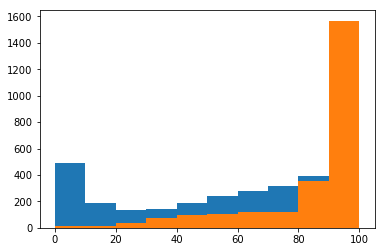

In [14]:
plt.hist(schl['Wh_pct_s'])
plt.hist(schl['Wh_pct_t'])

(0, 2200)

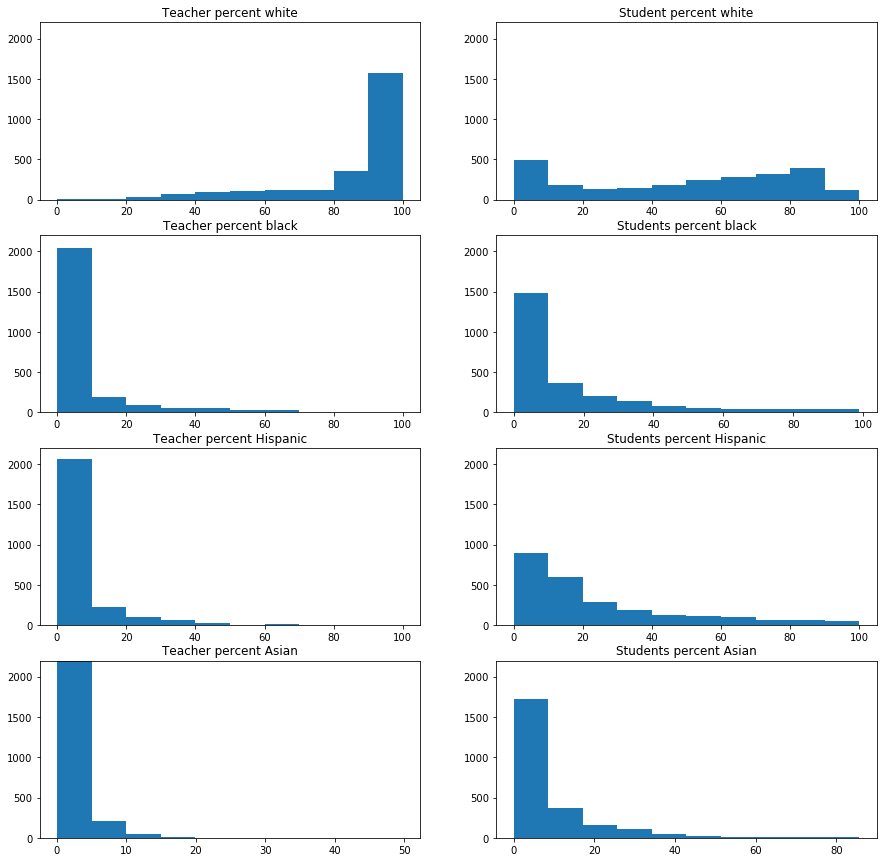

In [15]:
fig = plt.figure(figsize=[15, 15])

ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

ax1.hist(schl['Wh_pct_t'])
ax1.set_title("Teacher percent white")
ax1.set_ylim(0, 2200)

ax2.hist(schl['Wh_pct_s'])
ax2.set_title("Student percent white")
ax2.set_ylim(0, 2200)

ax3.hist(schl['Bl_pct_t'])
ax3.set_title("Teacher percent black")
ax3.set_ylim(0, 2200)

ax4.hist(schl['Bl_pct_s'])
ax4.set_title("Students percent black")
ax4.set_ylim(0, 2200)

ax5.hist(schl['His_pct_t'])
ax5.set_title("Teacher percent Hispanic")
ax5.set_ylim(0, 2200)

ax6.hist(schl['His_pct_s'])
ax6.set_title("Students percent Hispanic")
ax6.set_ylim(0, 2200)

ax7.hist(schl['As_pct_t'])
ax7.set_title("Teacher percent Asian")
ax7.set_ylim(0, 2200)

ax8.hist(schl['As_pct_s'])
ax8.set_title("Students percent Asian")
ax8.set_ylim(0, 2200)

# ax3.hist(schl['BL_PCT'])
# ax3.set_title("Teacher percent black")

In [16]:
schl["s_t_min_pnct_diff"] = schl['Min_pct_t'] - schl['Min_pct_s']

In [17]:
schl["s_t_min_pnct_diff"].describe()

count    2491.000000
mean      -36.720030
std        21.944748
min      -100.000000
25%       -53.186324
50%       -34.411382
75%       -18.787528
max        82.059801
Name: s_t_min_pnct_diff, dtype: float64

In [18]:
schl.groupby('COUNTY_NAME_x').median().iloc[:,32].sort_values(ascending=False)

COUNTY_NAME_x
SUSSEX       -10.087669
HUNTERDON    -12.147179
WARREN       -15.075377
OCEAN        -17.894530
CAPE MAY     -19.685039
GLOUCESTER   -20.626804
MONMOUTH     -20.874600
MORRIS       -22.749571
SALEM        -24.793269
BURLINGTON   -29.016783
ESSEX        -31.486780
CAMDEN       -34.663327
BERGEN       -37.748699
SOMERSET     -41.459767
UNION        -43.893638
PASSAIC      -44.200752
ATLANTIC     -46.565460
MERCER       -48.571594
HUDSON       -49.760465
CHARTERS     -54.012951
CUMBERLAND   -56.937927
MIDDLESEX    -57.546383
Name: s_t_min_pnct_diff, dtype: float64

In [19]:
schl['Wh_pct_s'].describe()

count    2491.000000
mean       48.412326
std        31.267217
min         0.000000
25%        16.479059
50%        54.694570
75%        76.686747
max       100.000000
Name: Wh_pct_s, dtype: float64

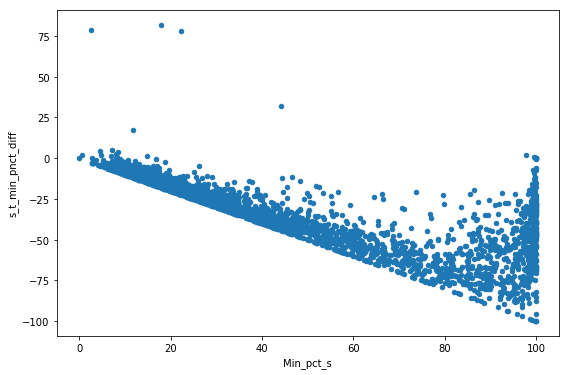

In [20]:
schl.plot(figsize=[9,6], kind='scatter', x='Min_pct_s', y='s_t_min_pnct_diff')

In [21]:
schl['s_t_abs_difference'] = schl['s_t_min_pnct_diff'].abs()

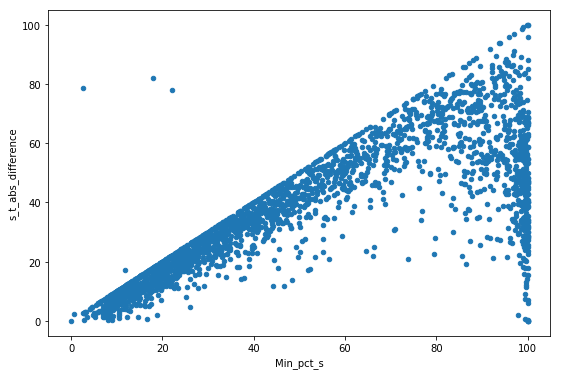

In [22]:
schl.plot(figsize=[9,6], kind='scatter', x='Min_pct_s', y='s_t_abs_difference')

In [23]:
te99 = schl[schl['Wh_pct_t']>99]
te100 = schl[schl['Wh_pct_t'] == 100]
te100.shape

(485, 47)

In [24]:
schl.groupby('DISTRICT_NAME').median().iloc[:,1].sort_values().head(10)

DISTRICT_NAME
IRVINGTON TOWNSHIP                     0.00
Merit Prep CS of Newark                0.50
Lady Liberty Academy CS                6.10
Burch Charter School of Excellence    17.90
ISLAND HEIGHTS BORO                   18.70
HOLA Hoboken Dual Lang CS             23.80
John P Holland Charter School         26.70
Newark Legacy CS                      27.60
EAST ORANGE                           29.15
Jersey City Comm. CS                  30.00
Name: Wh_pct_t, dtype: float64

In [25]:
schl.pivot_table(index=['SCHOOL_NAME_x', 'DISTRICT_NAME'],values='Wh_pct_t').sort_values().head(10)

SCHOOL_NAME_x                               DISTRICT_NAME          
THURGOOD MARSHALL SCHOOL                    IRVINGTON TOWNSHIP         0.0
BERKELEY TERRACE                            IRVINGTON TOWNSHIP         0.0
GROVE STREET SCHOOL                         IRVINGTON TOWNSHIP         0.0
MADISON AT CHANCELLOR SOUTH                 IRVINGTON TOWNSHIP         0.0
Port Colden School                          WASHINGTON TWP             0.0
AUGUSTA PRESCHOOL ACADEMY                   IRVINGTON TOWNSHIP         0.0
FLORENCE AVENUE SCHOOL                      IRVINGTON TOWNSHIP         0.0
Brass Castle School                         WASHINGTON TWP             0.0
MT. VERNON AVENUE SCHOOL                    IRVINGTON TOWNSHIP         0.0
Merit Preparatory Charter School of Newark  Merit Prep CS of Newark    0.5
Name: Wh_pct_t, dtype: float64

In [26]:
#Load in geocoded school data to combine with teacher data
stgeo = pd.read_csv('Geocoded_school_students.csv', dtype={'COUNTY_ID':str, 'DIST_ID':str, 'SCHOOL_ID':str})

In [27]:
stgeo.columns

Index([u'COUNTY_ID', u'COUNTY_NAME', u'DIST_ID', u'LEA_NAME', u'SCHOOL_ID',
       u'FULL_ID', u'SCHOOL_NAME', u'PRGCODE', u'GRADE_LEVEL', u'ROW_TOTAL',
       u'FREE_LUNCH', u'REDUCED_PRICE_LUNCH', u'LEP', u'MIGRANT',
       u'White_total', u'Black_total', u'Hispanic_total', u'Asian_total',
       u'Other_total', u'White_pcnt', u'black_pnct', u'Hispanic_pnct',
       u'Asian_pnct', u'Other_pnct', u'Diversity_index', u'Address_1',
       u'Address_2', u'City', u'State', u'Zip', u'Concatenate',
       u'Concatenate sans zip', u'Address_with_zip', u'JSON_2', u'Longitude',
       u'Latitude'],
      dtype='object')

In [28]:
stgeo['CONCAT_ID_geo'] = stgeo['COUNTY_ID'].str.cat([stgeo['DIST_ID'], stgeo['SCHOOL_ID']])

In [29]:
stgeocol = stgeo.columns.difference(schl.columns)

In [30]:
schlgeo2 = schl.merge(stgeo[stgeocol], left_on='TEACH_CONCAT_CODE', right_on='CONCAT_ID_geo' )

In [31]:
# schlgeo2.to_csv('student_and_teacher_data_geocoded.csv')

In [32]:
# schl.to_csv('teacher_student_school_data.csv')

In [33]:
co = pd.read_csv('county_students.csv', dtype={'COUNTY_ID':str})

In [34]:
co.columns

Index([u'﻿COUNTY_ID', u'COUNTY_NAME', u'DIST_ID', u'LEA_NAME', u'SCHOOL_ID',
       u'SCHOOL_NAME', u'PRGCODE', u'GRADE_LEVEL', u'WH_M', u'WH_F', u'BL_M',
       u'BL_F', u'HI_M', u'HI_F', u'AS_M', u'AS_F', u'AM_M', u'AM_F', u'PI_M',
       u'PI_F', u'MU_M', u'MU_F', u'ROW_TOTAL', u'FREE_LUNCH',
       u'REDUCED_PRICE_LUNCH', u'LEP', u'MIGRANT', u'White_total',
       u'Black_total', u'Hispanic_total', u'Asian_total', u'Other_total',
       u'White_pcnt', u'black_pnct', u'Hispanic_pnct', u'Asian_pnct',
       u'Other_pnct', u'Diversity_index'],
      dtype='object')

In [35]:
co['White_pcnt'] = co['White_pcnt']*100
co['black_pnct'] = co['black_pnct']*100
co['Hispanic_pnct'] = co['Hispanic_pnct']*100
co['Asian_pnct'] = co['Asian_pnct']*100
co['Other_pnct'] = co['Other_pnct']*100

In [38]:
co = co[[ u'COUNTY_NAME', u'ROW_TOTAL', u'White_total',
       u'Black_total', u'Hispanic_total', u'Asian_total', u'Other_total',
       u'White_pcnt', u'black_pnct', u'Hispanic_pnct', u'Asian_pnct',
       u'Other_pnct', u'Diversity_index']]
co = co.rename(columns={u'White_total':'Wh_tot_co_s', u'Black_total':'Bl_tot_co_s', u'Hispanic_total':'His_tot_co_s', u'Asian_total':'As_tot_co_s', u'Other_total':'Ot_tot_co_s',
       u'White_pcnt':'Wh_pct_co_s', u'black_pnct':'Bl_pct_co_s', u'Hispanic_pnct':'His_pct_co_s', u'Asian_pnct':'As_pct_co_s',
       u'Other_pnct':'Ot_pct_co_s', u'Diversity_index':'Div_index_co_s','COUNTY_NAME':'COUNTY_NAME_x'})

In [40]:
schlco = schl.merge(co,on='COUNTY_NAME_x', how='left')

(0, 550)

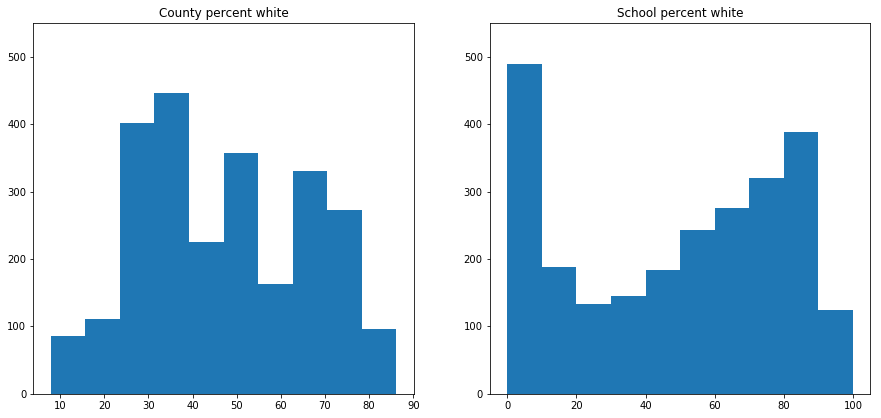

In [41]:
fig = plt.figure(figsize=[15, 15])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(schlco['Wh_pct_co_s'])
ax1.set_title("County percent white")
ax1.set_ylim(0, 550)

ax2.hist(schl['Wh_pct_s'])
ax2.set_title("School percent white")
ax2.set_ylim(0, 550)

In [43]:
schlco.shape

(2491, 59)

In [44]:
min_schl = schl.sort_values('Min_pct_s', ascending=False).head(625)
schl['Min_students'] = schl['Bl_tot_s'] +  schl['His_tot_s'] + schl['As_tot_s'] + schl['Ot_tot_s']
min_schl['Min_students'] = min_schl['Bl_tot_s'] +  min_schl['His_tot_s'] + min_schl['As_tot_s'] + min_schl['Ot_tot_s']
min_schl['Min_students'].sum()/schl['Min_students'].sum()

0.47842114531190921

In [45]:
schlco['Schl_co_pct_wh_diff'] = ((schlco['Wh_pct_s'] - schlco['Wh_pct_co_s'])/schlco['Wh_pct_co_s'])*100

In [46]:
schlco.sort_values(by='Schl_co_pct_wh_diff').head(5)

,COUNTY_NAME_x,DIST_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME_x,Wh_tot_t,Wh_pct_t,Bl_tot_t,Bl_pct_t,His_tot_t,...,His_tot_co_s,As_tot_co_s,Ot_tot_co_s,Wh_pct_co_s,Bl_pct_co_s,His_pct_co_s,As_pct_co_s,Ot_pct_co_s,Div_index_co_s,Schl_co_pct_wh_diff
786,ESSEX,2330,IRVINGTON TOWNSHIP,135,UNIVERSIY MIDDLE SCHOOL,2.0,66.7,0.0,0.0,1.0,...,31275.0,6208.0,1957.0,28.249231,38.101332,26.683218,5.296544,1.669674,0.700743,-100.0
755,ESSEX,1210,EAST ORANGE,120,Ecole Toussaint Louverture,8.0,32.0,16.0,64.0,1.0,...,31275.0,6208.0,1957.0,28.249231,38.101332,26.683218,5.296544,1.669674,0.700743,-100.0
2440,CHARTERS,6090,Paulo Freire Charter School,977,Paulo Freire Charter School,4.0,40.0,3.0,30.0,2.0,...,12967.5,2039.0,482.0,7.828286,55.396341,30.789596,4.841333,1.144445,0.589722,-100.0
2438,CHARTERS,6086,Hope Community CS,972,Hope Community CS,10.6,46.9,6.0,26.5,1.0,...,12967.5,2039.0,482.0,7.828286,55.396341,30.789596,4.841333,1.144445,0.589722,-100.0
2437,CHARTERS,6083,Knowledge A to Z Charter School,968,Knowledge A to Z Charter School,34.5,87.9,2.0,5.1,1.8,...,12967.5,2039.0,482.0,7.828286,55.396341,30.789596,4.841333,1.144445,0.589722,-100.0


In [44]:
schlco['Schl_co_pct_wh_diff_abs'] = schlco['Schl_co_pct_wh_diff'].abs()

In [48]:
schlco.sort_values(by='Schl_co_pct_wh_diff_abs').head(5)

,COUNTY_NAME_x,DIST_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME_x,Wh_tot_t,Wh_pct_t,Bl_tot_t,Bl_pct_t,His_tot_t,...,As_tot_co_s,Ot_tot_co_s,Wh_pct_co_s,Bl_pct_co_s,His_pct_co_s,As_pct_co_s,Ot_pct_co_s,Div_index_co_s,Schl_co_pct_wh_diff,Schl_co_pct_wh_diff_abs
2374,WARREN,1840,GREENWICH TWP,40,Greenwich School,42.9,100.0,0.0,0.0,0.0,...,493.0,347.0,75.819256,6.571957,12.594759,2.942756,2.071271,0.403667,0.027803,0.027803
2396,WARREN,5450,WARREN CO SPECIAL SERVICE,50,Warren County Special Services School,10.5,100.0,0.0,0.0,0.0,...,493.0,347.0,75.819256,6.571957,12.594759,2.942756,2.071271,0.403667,0.056467,0.056467
2307,UNION,4550,ROSELLE PARK BORO,85,Roselle Park Middle School,40.4,97.6,0.0,0.0,1.0,...,4637.0,1362.0,34.235050,21.389356,37.905018,5.001510,1.469066,0.690649,-0.137334,0.137334
1811,OCEAN,2360,JACKSON TWP,30,Crawford-Rodriguez Elementary School,56.0,96.6,0.0,0.0,2.0,...,1652.0,1333.0,73.112820,5.055176,17.598082,2.343196,1.890726,0.431020,-0.171102,0.171102
169,BERGEN,1700,GARFIELD CITY,120,WASHINGTON IRVING SCHOOL #4,35.0,92.1,0.0,0.0,3.0,...,21264.0,3035.0,52.671316,5.821055,23.343276,15.895584,2.268769,0.638912,0.177821,0.177821


In [55]:
co_t = pd.read_csv('teacher_diversity_data_id.csv', dtype={'CO_CODE':str, 'DIST_CODE':str, 'SCHOOL_CODE':str, 'TEACH_CONCAT_CODE':str})

In [58]:
co_t = co_t[co_t['DIST_CODE'] == '9998']
co_t = co_t[co_t['POSITION'] == 'TEACHER']
co_t = co_t[co_t['GENDER'] == 'Total']

In [62]:
co_t = co_t[[ u'COUNTY_NAME', u'DIST_CODE', u'DISTRICT_NAME',
       u'SCHOOL_CODE', u'SCHOOL_NAME', u'WHITE',
       u'WH_PCT', u'BLACK', u'BL_PCT', u'HISPANIC', u'HI_PCT', u'ASIAN',
       u'AS_PCT', u'AMERICAN_INDIAN', u'AM_PCT', u'PACIFIC_ISLANDER',
       u'PI_PCT', u'OTHER', u'OT_PCT', u'MIN_PCT', u'TOTAL',
       u'TEACH_CONCAT_CODE']]

co_t = co_t.rename(columns={u'WHITE':'Wh_tot_co_t',
       u'WH_PCT':'Wh_pct_co_t', u'BLACK':'Bl_tot_co_t', u'BL_PCT':'Bl_pct_co_t', u'HISPANIC':'His_tot_co_t', 
        u'HI_PCT':'His_pct_co_t', u'ASIAN':'As_tot_co_t',
       u'AS_PCT':'As_pct_co_t', u'AMERICAN_INDIAN':'Am_tot_co_t', u'AM_PCT':'Am_pct_co_t', u'PACIFIC_ISLANDER':'Pi_tot_co_t',
       u'PI_PCT':'Pi_pct_co_t', u'OTHER':'Ot_tot_co_t', u'OT_PCT':'Ot_pct_co_t', u'MIN_PCT':'Min_pct_co_t', u'TOTAL':'Tot_co_t'})

In [64]:
co_t = co_t.rename(columns={u'COUNTY_NAME':'COUNTY_NAME_x',})

In [66]:
schlco = schlco.merge(co_t, on='COUNTY_NAME_x', how='left')

In [67]:
schlco

,COUNTY_NAME_x,DIST_CODE_x,DISTRICT_NAME_x,SCHOOL_CODE_x,SCHOOL_NAME_x,Wh_tot_t,Wh_pct_t,Bl_tot_t,Bl_pct_t,His_tot_t,...,As_pct_co_t,Am_tot_co_t,Am_pct_co_t,Pi_tot_co_t,Pi_pct_co_t,Ot_tot_co_t,Ot_pct_co_t,Min_pct_co_t,Tot_co_t,TEACH_CONCAT_CODE_y
0,ATLANTIC,10,ABSECON CITY,50,Emma C Attales,25.0,92.6,0.0,0.0,2.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
1,ATLANTIC,10,ABSECON CITY,60,H Ashton Marsh,37.6,100.0,0.0,0.0,0.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
2,ATLANTIC,110,ATLANTIC CITY,10,Atlantic City High School,115.0,74.7,25.0,16.2,11.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
3,ATLANTIC,110,ATLANTIC CITY,30,Sovereign Avenue School,36.3,56.3,9.2,14.2,13.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
4,ATLANTIC,110,ATLANTIC CITY,50,Chelsea Heights School,28.3,82.5,3.0,8.7,3.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
5,ATLANTIC,110,ATLANTIC CITY,60,Texas Avenue School,25.5,51.8,14.0,28.5,6.7,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
6,ATLANTIC,110,ATLANTIC CITY,70,New York Avenue School,24.3,45.4,24.2,45.2,4.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
7,ATLANTIC,110,ATLANTIC CITY,80,Uptown School Complex,24.3,45.4,25.0,46.8,2.2,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
8,ATLANTIC,110,ATLANTIC CITY,100,PENNSYLVANIA AVE SCHOOL,25.6,50.1,21.4,42.0,4.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
9,ATLANTIC,110,ATLANTIC CITY,120,Richmond Avenue School,36.9,63.5,15.2,26.2,4.0,...,0.6,7.0,0.2,2.0,0.1,16.0,0.4,13.7,3844.3,19998998
